# Paris Neighbourhood Data
- This file is to scape the neighbourhood and postcal code from wikipedia page.
- And derive the longtitude and lattitude of each neighbourhood.

In [1]:
from bs4 import BeautifulSoup # Use 'BeautifulSoup' package to retrive data from a webpage
import requests               # Requesting data from a web address
import csv                    # Creat stream to write the data from webpage to a csv file
import numpy as np   # library for vectorized computation
import pandas as pd  # library to process data as dataframes

## Scrape Neighbourhoods From Wiki Page

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Arrondissements_of_Paris').text
soup = BeautifulSoup(source,'lxml')

In [3]:
#Open a writable csv file, which we will use to store the postcode table
table_csv = open('Paris_neighbourhood_wiki.csv','w')
csv_writer = csv.writer(table_csv)
csv_writer.writerow(['PostalCode','Arrondissements','Neighbourhood'])

42

In [4]:
# Parser postcode table tag from the webpage
table = soup.find('table',class_='wikitable sortable')
#print(table)

In [5]:
row = table.find('tr')
row_split = row.text.split('\n\n')
print(row_split)

['\nArrondissement (R for Right Bank, L for Left Bank)', 'Name', 'Area (km2)', 'Population(March 1999 census)', 'Population(July 2005 estimate)', 'Density (2005)(inhabitants per km2)', 'Peak of population', 'Mayor\n']


In [6]:
# Retrive text in the first row of the table
row = table.find('tr')
row_split = row.text.split('\n\n')
Arron = row_split[0]
Neighbour = row_split[1]
print(Arron, Neighbour)


Arrondissement (R for Right Bank, L for Left Bank) Name


In [7]:
# Retirve text of all rows in the postcode table.
# Write every row of the table to 'pc_wiki.csv' file opened earlier.
# Skip the first row since they are headers.

for row in table.find_all('tr')[1:]:
    row_split = row.text.split('\n')
    Arrondissements = row_split[1]
    Neighbourhood = row_split[2]
    if Arrondissements[1].isnumeric(): PostalCode = '750'+Arrondissements[0:2]
    else: PostalCode = '7500'+Arrondissements[0]
    print(PostalCode,' and ', Arrondissements,' and ', Neighbourhood)
    csv_writer.writerow([PostalCode, Arrondissements, Neighbourhood]) 

75001  and  1st (Ie) R  and  Louvre
75002  and  2nd (IIe) R  and  Bourse
75003  and  3rd (IIIe) R  and  Temple
75004  and  4th (IVe) R  and  Hôtel-de-Ville
75005  and  5th (Ve) L  and  Panthéon
75006  and  6th (VIe) L  and  Luxembourg
75007  and  7th (VIIe) L  and  Palais-Bourbon
75008  and  8th (VIIIe) R  and  Élysée
75009  and  9th (IXe) R  and  Opéra
75010  and  10th (Xe) R  and  Entrepôt
75011  and  11th (XIe) R  and  Popincourt
75012  and  12th (XIIe) R  and  Reuilly
75013  and  13th (XIIIe) L  and  Gobelins
75014  and  14th (XIVe) L  and  Observatoire
75015  and  15th (XVe) L  and  Vaugirard
75016  and  16th (XVIe) R  and  Passy
75017  and  17th (XVIIe) R  and  Batignolles-Monceau
75018  and  18th (XVIIIe) R  and  Butte-Montmartre
75019  and  19th (XIXe) R  and  Buttes-Chaumont
75020  and  20th (XXe) R  and  Ménilmontant


In [8]:
# After writing the table, close up the 'pc_wiki.csv' file.
table_csv.close()

In [9]:
# Read the 'Paris_neighbourhood_wiki.csv' file into pandas dataframe.
paris_df = pd.read_csv('Paris_neighbourhood_wiki.csv')
paris_df

,PostalCode,Arrondissements,Neighbourhood
0,75001,1st (Ie) R,Louvre
1,75002,2nd (IIe) R,Bourse
2,75003,3rd (IIIe) R,Temple
3,75004,4th (IVe) R,Hôtel-de-Ville
4,75005,5th (Ve) L,Panthéon
5,75006,6th (VIe) L,Luxembourg
6,75007,7th (VIIe) L,Palais-Bourbon
7,75008,8th (VIIIe) R,Élysée
8,75009,9th (IXe) R,Opéra
9,75010,10th (Xe) R,Entrepôt


## Latitude and Longitude
Get the latitude and the longitude coordinates of each neighborhood

In [10]:
! pip install geocoder
import geocoder # import geocoder
from geopy.geocoders import Nominatim

    100% |████████████████████████████████| 102kB 15.3MB/s a 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [11]:
address = 'Élysée, Paris'

geolocator = Nominatim(user_agent="tn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of '+ address+' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Élysée, Paris are 48.8466437, 2.3698297.


In [12]:
lat = []
long = []
Neighbourhood = paris_df['Neighbourhood']

for n in Neighbourhood:
    address = n+', Paris'
    geolocator = Nominatim(user_agent="tn_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    lat.append(latitude)
    long.append(longitude)

    
print(len(lat),len(long))

20 20


In [13]:
lat_df = pd.DataFrame({'Latitude': lat})
long_df = pd.DataFrame({'Longitude': long})
paris_df = pd.concat([paris_df,lat_df,long_df], axis=1)
paris_df

,PostalCode,Arrondissements,Neighbourhood,Latitude,Longitude
0,75001,1st (Ie) R,Louvre,48.861147,2.338028
1,75002,2nd (IIe) R,Bourse,48.867687,2.343122
2,75003,3rd (IIIe) R,Temple,48.862683,2.358681
3,75004,4th (IVe) R,Hôtel-de-Ville,48.856426,2.352528
4,75005,5th (Ve) L,Panthéon,48.846191,2.346079
5,75006,6th (VIe) L,Luxembourg,48.849392,2.332260
6,75007,7th (VIIe) L,Palais-Bourbon,48.861692,2.319031
7,75008,8th (VIIIe) R,Élysée,48.846644,2.369830
8,75009,9th (IXe) R,Opéra,48.870645,2.332330
9,75010,10th (Xe) R,Entrepôt,48.876008,2.360442


### Create a map of Paris with neighborhoods superimposed on top

In [14]:
! pip install folium
import folium # map rendering library

    100% |████████████████████████████████| 92kB 13.0MB/s ta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [15]:
# Create a map using coordinate of Paris
paris_lat = 48.8566
paris_long = 2.3522
map_paris = folium.Map(location=[paris_lat, paris_long], zoom_start=12)

# add markers to map
for lat, lng, arrondissements, neighbourhood in zip(paris_df['Latitude'], paris_df['Longitude'], paris_df['Arrondissements'], paris_df['Neighbourhood']):
    label = '{}, {}'.format(arrondissements, neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

# Paris Neighbourhoods Data from Foursquare API

In [16]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
# Import metrics library - jaccard_similarity_score function
from sklearn import metrics

In [17]:
CLIENT_ID = '4MIXTGO3DB01HSNLMM2BKUSNFD1IZ2BQUB0JF1HOOLHTFOTK' # your Foursquare ID
CLIENT_SECRET = 'NGSDMH0BKBEN4BYBVK5IWIB3TVDAD1LA0IL0IKLHB3EWR3OR' # your Foursquare Secret
VERSION = '20190611' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4MIXTGO3DB01HSNLMM2BKUSNFD1IZ2BQUB0JF1HOOLHTFOTK
CLIENT_SECRET:NGSDMH0BKBEN4BYBVK5IWIB3TVDAD1LA0IL0IKLHB3EWR3OR


In [18]:
# Get the neighborhood's latitude and longitude values.
nbhood_latitude = paris_df.loc[0,'Latitude']  # neighborhood latitude value
nbhood_longitude= paris_df.loc[0,'Longitude'] # neighborhood longitude value
nbhood_name = paris_df.loc[0,'Neighbourhood']  # neighborhood name
print('Latitude and longitude values of {} are {}, {}.'.format(nbhood_name,nbhood_latitude,nbhood_longitude))

Latitude and longitude values of Louvre are 48.8611473, 2.33802768704666.


**Now, let's get the top 100 venues that are in 'Louvre' within a radius of 500 meters.**

In [19]:
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
      .format(CLIENT_ID,CLIENT_SECRET, nbhood_latitude, nbhood_longitude, VERSION, radius, LIMIT)
                                                                                                                           
url 

'https://api.foursquare.com/v2/venues/explore?client_id=4MIXTGO3DB01HSNLMM2BKUSNFD1IZ2BQUB0JF1HOOLHTFOTK&client_secret=NGSDMH0BKBEN4BYBVK5IWIB3TVDAD1LA0IL0IKLHB3EWR3OR&ll=48.8611473,2.33802768704666&v=20190611&radius=500&limit=100'

In [20]:
# Send the GET request and examine the resutls
results = requests.get(url).json()

In [21]:
# Convert venues to pandas dataframe
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

In [22]:
# Filter out main features of venues
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues[filtered_columns]
range(nearby_venues.shape[0])

range(0, 100)

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

In [25]:
# clean title of the columns
nearby_venues.columns = [col.split('.')[-1] for col in nearby_venues.columns]
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


**Repeat the above for each Neighbourhood in Paris**

In [26]:
def getNearbyVunues(nbhood_latitude,nbhood_longitude,nbhood_name,radius,LIMIT):
    
    venues_list = pd.DataFrame()
    
    for name, lat, lng in zip(nbhood_name, nbhood_latitude,nbhood_longitude):
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
               .format(CLIENT_ID,CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
        
        results = requests.get(url).json()
        venues = results['response']['groups'][0]['items']
        nearby_venues = json_normalize(venues)
        nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
        print(name,'....Done.')
        
        # return only relevant information for each nearby venue
        for ind in  range(nearby_venues.shape[0]):
            
            venues_list = venues_list.append({'Neighbourhood': name,
                                              'Neighbourhood Latitude': lat, 
                                              'Neighbourhood Longitude': lng,
                                              'Venue': nearby_venues['venue.name'][ind],
                                              'Venue Latitude':  nearby_venues['venue.location.lat'][ind],
                                              'Venue Longitude': nearby_venues['venue.location.lng'][ind],
                                              'Venue Category':nearby_venues['venue.categories'][ind]}, ignore_index=True)
            
    return(venues_list)
        

In [27]:
# Get venues of Paris Neighbourhood
paris_venues = getNearbyVunues(paris_df['Latitude'],
                                 paris_df['Longitude'],
                                 paris_df['Neighbourhood'],
                                 radius = 500,
                                 LIMIT = 100 )
paris_venues.shape

Louvre ....Done.
Bourse ....Done.
Temple ....Done.
Hôtel-de-Ville ....Done.
Panthéon ....Done.
Luxembourg ....Done.
Palais-Bourbon ....Done.
Élysée ....Done.
Opéra ....Done.
Entrepôt ....Done.
Popincourt ....Done.
Reuilly ....Done.
Gobelins ....Done.
Observatoire ....Done.
Vaugirard ....Done.
Passy ....Done.
Batignolles-Monceau ....Done.
Butte-Montmartre ....Done.
Buttes-Chaumont ....Done.
Ménilmontant ....Done.


(1307, 7)

In [28]:
paris_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Louvre,48.861147,2.338028,Cour Carrée du Louvre,Pedestrian Plaza,48.860360,2.338543
1,Louvre,48.861147,2.338028,Musée du Louvre,Art Museum,48.860847,2.336440
2,Louvre,48.861147,2.338028,La Vénus de Milo (Vénus de Milo),Exhibit,48.859943,2.337234
3,Louvre,48.861147,2.338028,Place du Palais Royal,Plaza,48.862523,2.336688
4,Louvre,48.861147,2.338028,Le Fumoir,Cocktail Bar,48.860341,2.340647


In [29]:
print('There are {} unique categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 214 unique categories.


**Explore venue category in each neighbourhood**

In [30]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
paris_onehot.insert(loc=0, column='AllNeighbourhoods', value=paris_venues['Neighbourhood'])

paris_onehot.head()

,AllNeighbourhoods,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Louvre,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
paris_onehot.shape

(1307, 215)

**Group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category**

In [32]:
paris_grouped = paris_onehot.groupby('AllNeighbourhoods').mean().reset_index()
paris_grouped.head()

,AllNeighbourhoods,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Batignolles-Monceau,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.019608,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.019608
1,Bourse,0.0,0.00,0.0,0.00,0.01,0.0,0.0,0.0,0.01,...,0.0,0.0,0.000000,0.000000,0.0,0.010000,0.060000,0.01,0.02,0.000000
2,Butte-Montmartre,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.000000,0.018182,0.0,0.036364,0.018182,0.00,0.00,0.000000
3,Buttes-Chaumont,0.0,0.00,0.0,0.02,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.000000,0.000000,0.0,0.020000,0.000000,0.00,0.00,0.000000
4,Entrepôt,0.0,0.02,0.0,0.00,0.00,0.0,0.0,0.0,0.02,...,0.0,0.0,0.000000,0.010000,0.0,0.000000,0.010000,0.02,0.00,0.000000


## Let us see the top 10 venues in each neighbourhood of Paris

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['AllNeighbourhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['AllNeighbourhoods'] = paris_grouped['AllNeighbourhoods']

for ind in np.arange(paris_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,AllNeighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles-Monceau,French Restaurant,Japanese Restaurant,Hotel,Italian Restaurant,Bakery,Bar,Restaurant,Bistro,Mediterranean Restaurant,Bike Rental / Bike Share
1,Bourse,French Restaurant,Wine Bar,Cocktail Bar,Salad Place,Italian Restaurant,Bistro,Bakery,Thai Restaurant,Burger Joint,Bar
2,Butte-Montmartre,French Restaurant,Bar,Italian Restaurant,Pizza Place,Restaurant,Vietnamese Restaurant,Coffee Shop,Café,Convenience Store,Gastropub
3,Buttes-Chaumont,Bar,French Restaurant,Restaurant,Hotel,Beer Bar,Italian Restaurant,Bistro,Supermarket,Café,Seafood Restaurant
4,Entrepôt,French Restaurant,Coffee Shop,Hotel,Bistro,Indian Restaurant,Café,Japanese Restaurant,Pizza Place,African Restaurant,Seafood Restaurant
5,Gobelins,Vietnamese Restaurant,Asian Restaurant,Chinese Restaurant,French Restaurant,Hotel,Thai Restaurant,Sushi Restaurant,Convenience Store,Plaza,Cambodian Restaurant
6,Hôtel-de-Ville,French Restaurant,Ice Cream Shop,Wine Bar,Plaza,Cosmetics Shop,Cocktail Bar,Hotel,Pastry Shop,Pedestrian Plaza,Bakery
7,Louvre,French Restaurant,Café,Hotel,Coffee Shop,Plaza,Italian Restaurant,Exhibit,Cosmetics Shop,Art Museum,Pizza Place
8,Luxembourg,Italian Restaurant,French Restaurant,Hotel,Bakery,Bistro,Japanese Restaurant,Chocolate Shop,Tea Room,Ice Cream Shop,Wine Bar
9,Ménilmontant,French Restaurant,Bakery,Bistro,Sushi Restaurant,Café,Fast Food Restaurant,Japanese Restaurant,Latin American Restaurant,Bookstore,Food


# Cluster Paris Neighbourhoods
**Choose the optimum number of clusters using Elbow Curve**

In [35]:
paris_grouped_clustering = paris_grouped.drop('AllNeighbourhoods', 1)

In [36]:
kclusters = range(1, 13)
kmeans = [KMeans(n_clusters=i, random_state=0).fit(paris_grouped_clustering) for i in kclusters]
kmeans
score = [kmeans[i].score(paris_grouped_clustering) for i in range(len(kmeans))]
score

[-0.79110141148175084,
 -0.57391475207119291,
 -0.45233362817978839,
 -0.36111986940917579,
 -0.28254276707491371,
 -0.23419538993588065,
 -0.20675836095209563,
 -0.18188511734514579,
 -0.15338986289344703,
 -0.13523785307176672,
 -0.11543293182841147,
 -0.097707685280088247]

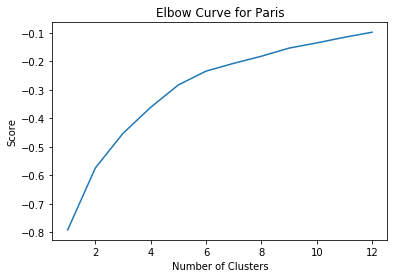

In [37]:
plt.plot(kclusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve for Paris')
plt.show()

**Run k-means to cluster the neighbourhood into 5 clusters.**
- From the elbow curve, the optimum number of clusters is indicated to be 5, since another cluster doesn't give much better modeling of the data.

In [38]:
# set number of clusters
k_clusters = 5

# paris_grouped_clustering = paris_grouped.drop('AllNeighbourhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 4, 2, 2, 2], dtype=int32)

In [39]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [40]:
paris_merged = paris_df.join(neighbourhoods_venues_sorted.set_index('AllNeighbourhoods'), on='Neighbourhood')

In [41]:
paris_merged.head()

,PostalCode,Arrondissements,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75001,1st (Ie) R,Louvre,48.861147,2.338028,2,French Restaurant,Café,Hotel,Coffee Shop,Plaza,Italian Restaurant,Exhibit,Cosmetics Shop,Art Museum,Pizza Place
1,75002,2nd (IIe) R,Bourse,48.867687,2.343122,2,French Restaurant,Wine Bar,Cocktail Bar,Salad Place,Italian Restaurant,Bistro,Bakery,Thai Restaurant,Burger Joint,Bar
2,75003,3rd (IIIe) R,Temple,48.862683,2.358681,2,French Restaurant,Japanese Restaurant,Restaurant,Burger Joint,Italian Restaurant,Hotel,Moroccan Restaurant,Coffee Shop,Bakery,Gourmet Shop
3,75004,4th (IVe) R,Hôtel-de-Ville,48.856426,2.352528,2,French Restaurant,Ice Cream Shop,Wine Bar,Plaza,Cosmetics Shop,Cocktail Bar,Hotel,Pastry Shop,Pedestrian Plaza,Bakery
4,75005,5th (Ve) L,Panthéon,48.846191,2.346079,2,French Restaurant,Hotel,Bar,Indie Movie Theater,Italian Restaurant,Bakery,Pub,Creperie,Ice Cream Shop,Plaza


## Finally, let's visualize the resulting clusters

In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Neighbourhood'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters
Based on the defining categories, character the properties of each cluster. 

In [43]:
paris_merged_grouped = paris_merged.sort_values(by=['Cluster Labels', '1st Most Common Venue']).reset_index()
paris_merged_grouped.head(20)

,index,PostalCode,Arrondissements,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6,75007,7th (VIIe) L,Palais-Bourbon,48.861692,2.319031,0,French Restaurant,Café,Plaza,Italian Restaurant,Hotel,Pedestrian Plaza,Beer Garden,Smoke Shop,Salad Place,Restaurant
1,13,75014,14th (XIVe) L,Observatoire,48.829567,2.323962,0,French Restaurant,Hotel,Café,Italian Restaurant,Bakery,Tea Room,Bistro,Thai Restaurant,Fried Chicken Joint,Bus Stop
2,19,75020,20th (XXe) R,Ménilmontant,48.861827,2.401073,0,French Restaurant,Bakery,Bistro,Sushi Restaurant,Café,Fast Food Restaurant,Japanese Restaurant,Latin American Restaurant,Bookstore,Food
3,15,75016,16th (XVIe) R,Passy,48.857151,2.256731,1,Lake,Basketball Court,Circus,Pool,Bike Rental / Bike Share,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant,English Restaurant
4,18,75019,19th (XIXe) R,Buttes-Chaumont,48.887009,2.383054,2,Bar,French Restaurant,Restaurant,Hotel,Beer Bar,Italian Restaurant,Bistro,Supermarket,Café,Seafood Restaurant
5,0,75001,1st (Ie) R,Louvre,48.861147,2.338028,2,French Restaurant,Café,Hotel,Coffee Shop,Plaza,Italian Restaurant,Exhibit,Cosmetics Shop,Art Museum,Pizza Place
6,1,75002,2nd (IIe) R,Bourse,48.867687,2.343122,2,French Restaurant,Wine Bar,Cocktail Bar,Salad Place,Italian Restaurant,Bistro,Bakery,Thai Restaurant,Burger Joint,Bar
7,2,75003,3rd (IIIe) R,Temple,48.862683,2.358681,2,French Restaurant,Japanese Restaurant,Restaurant,Burger Joint,Italian Restaurant,Hotel,Moroccan Restaurant,Coffee Shop,Bakery,Gourmet Shop
8,3,75004,4th (IVe) R,Hôtel-de-Ville,48.856426,2.352528,2,French Restaurant,Ice Cream Shop,Wine Bar,Plaza,Cosmetics Shop,Cocktail Bar,Hotel,Pastry Shop,Pedestrian Plaza,Bakery
9,4,75005,5th (Ve) L,Panthéon,48.846191,2.346079,2,French Restaurant,Hotel,Bar,Indie Movie Theater,Italian Restaurant,Bakery,Pub,Creperie,Ice Cream Shop,Plaza


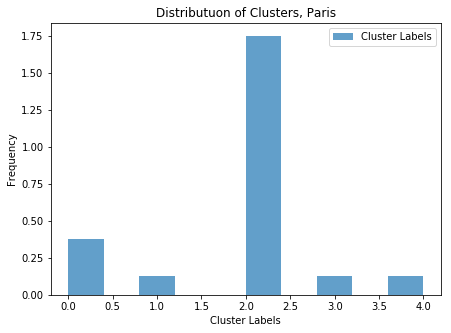

In [44]:
paris_merged_grouped.loc[:,['Cluster Labels']].plot(kind='hist',figsize=(7, 5),normed=1,alpha=0.7)

plt.xlabel('Cluster Labels') # add to x-label to the plot
plt.ylabel('Frequency') # add y-label to the plot
plt.title('Distributuon of Clusters, Paris') # add title to the plot
plt.show()

In [45]:
# Extrace the each cluster
cluster = {}
for i in range(0,k_clusters):
    clt_data = paris_merged_grouped.loc[paris_merged_grouped['Cluster Labels'] == i, 
                                       paris_merged_grouped.columns[[3] + list(range(7, paris_merged_grouped.shape[1]))]]
    cluster[i] = pd.DataFrame(data=clt_data)

cluster[0]


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Palais-Bourbon,French Restaurant,Café,Plaza,Italian Restaurant,Hotel,Pedestrian Plaza,Beer Garden,Smoke Shop,Salad Place,Restaurant
1,Observatoire,French Restaurant,Hotel,Café,Italian Restaurant,Bakery,Tea Room,Bistro,Thai Restaurant,Fried Chicken Joint,Bus Stop
2,Ménilmontant,French Restaurant,Bakery,Bistro,Sushi Restaurant,Café,Fast Food Restaurant,Japanese Restaurant,Latin American Restaurant,Bookstore,Food


In [46]:
frt = cluster[0]['1st Most Common Venue']
snd = cluster[0]['2nd Most Common Venue']
trd = cluster[0]['3rd Most Common Venue']
allVenues = frt.append(snd).append(trd)
allVenues.value_counts()

French Restaurant    3
Café                 2
Plaza                1
Bakery               1
Hotel                1
Bistro               1
dtype: int64

In [47]:
frtComVen = {}
for i in range(0,k_clusters):
    frt = cluster[i]['1st Most Common Venue']
    snd = cluster[i]['2nd Most Common Venue']
    trd = cluster[i]['3rd Most Common Venue']
    allVenues = frt.append(snd).append(trd)
    frtComVen[i] = pd.DataFrame(allVenues.value_counts(), columns=['Top 3 Most Common Venues'])

frtComVen[0]

,Top 3 Most Common Venues
French Restaurant,3
Café,2
Plaza,1
Bakery,1
Hotel,1
Bistro,1


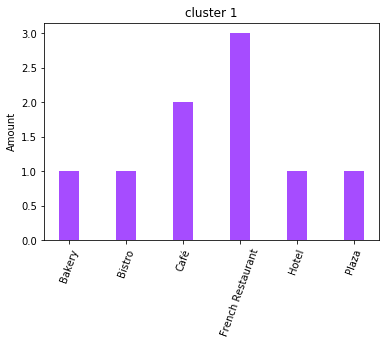

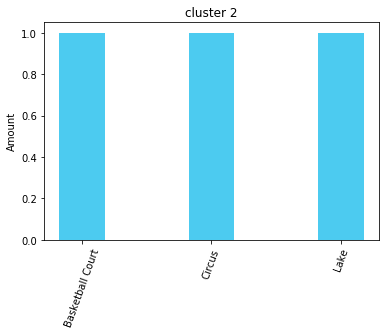

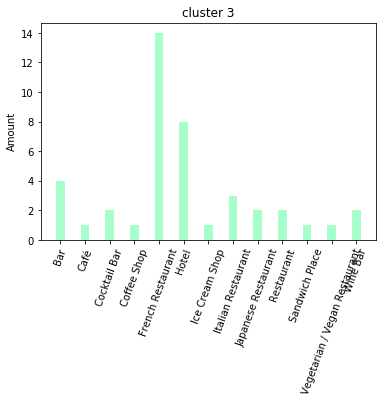

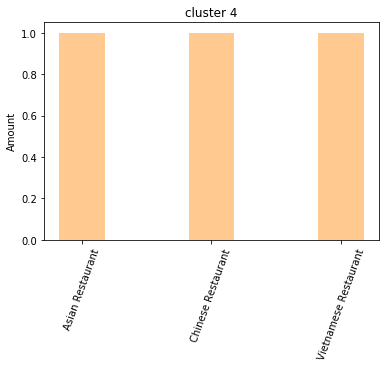

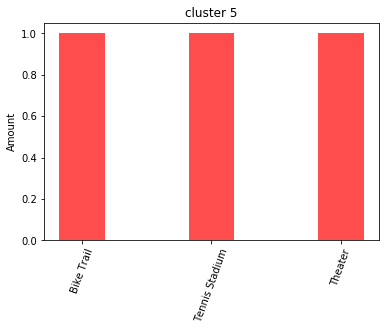

In [54]:
for i in range(0,k_clusters):
    temLable = 'cluster '+str(i+1)
    plt.bar(frtComVen[i].index, frtComVen[i]['Top 3 Most Common Venues'],align='center', width = 0.35,color = rainbow[i],alpha=0.7)
    plt.title('Cluster '+str(i+1))
    plt.xticks(rotation=70)
    plt.ylabel('Amount') 
    plt.title(temLable)
    plt.figsize=(15, 5)
    plt.show()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


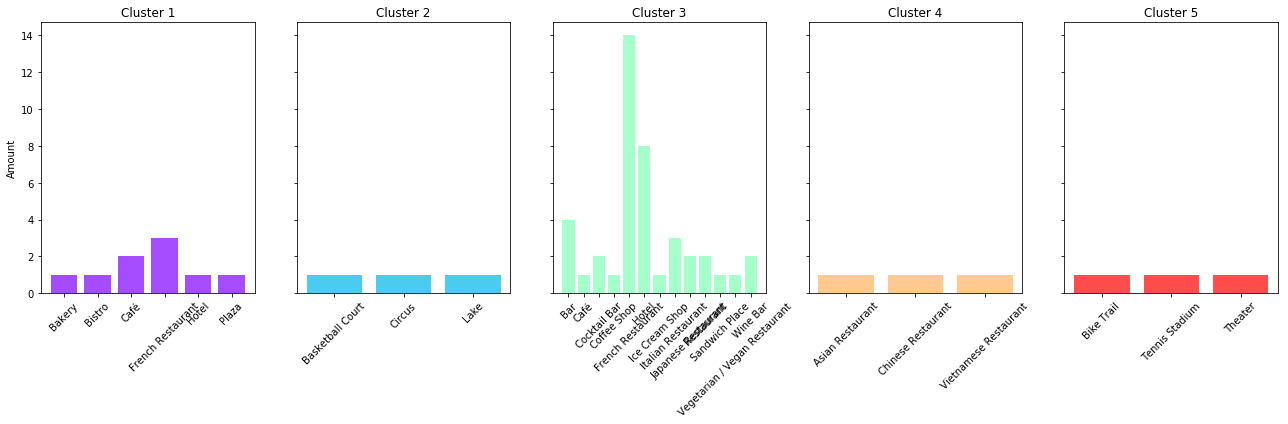

In [49]:
# Subplots all clusters in one figure
fig, axs = plt.subplots(1, k_clusters, figsize=(18, 6), sharey=True, tight_layout=True)

#maxn = 13
for i in range(0,k_clusters):
    temLable = ['cluster '+str(i+1)]
    axs[i].bar(frtComVen[i].index, frtComVen[i]['Top 3 Most Common Venues'],align='center',color = rainbow[i],alpha=0.7, label=temLable)
    axs[i].set_title('Cluster '+str(i+1))
    #axs[i].set_xlim(-0.5,maxn-0.5)
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(45)

#fig.suptitle('Top 3 Most Common Venues in each cluster',fontsize=16)
axs[0].set_ylabel('Amount') 
fig.show()